1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


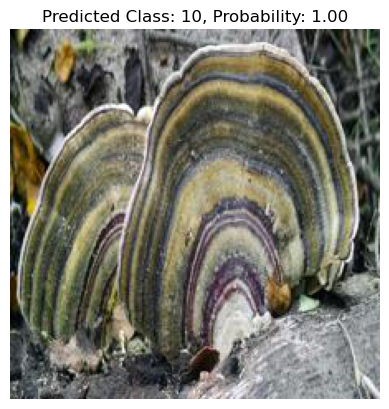

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the Keras model
model = load_model('resnet50_v3_callbacks.h5')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size based on your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Adjust based on your model
    return img_array

# Function to make predictions
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    return predictions

# Function to display the image and predictions
def display_prediction(img_path):
    predictions = predict_image(img_path)

    # Assuming the model outputs a probability distribution
    predicted_class = np.argmax(predictions, axis=-1)[0]  # Get the predicted class index
    predicted_prob = predictions[0][predicted_class]  # Get the predicted probability

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}, Probability: {predicted_prob:.2f}')
    plt.show()

# Path to the image you want to predict
img_path = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation/42/724211.jpg'

# Call the display function
display_prediction(img_path)


In [7]:
data_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/test'

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Keras model
model = load_model('resnet50_v3_callbacks.h5')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size based on your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Adjust based on your model
    return img_array

# Function to make predictions
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)[0]  # Returns the predicted class as an integer
    return predicted_class

# Set the path to your validation folder (which contains subfolders named by the actual classes)
validation_folder = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation/'

# Create a dictionary to map folder names (class names) to numerical indices
label_to_index = {}
index_to_label = {}
for index, folder_name in enumerate(sorted(os.listdir(validation_folder))):
    label_to_index[folder_name] = index
    index_to_label[index] = folder_name

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through each folder (each class name)
for folder_name in os.listdir(validation_folder):
    folder_path = os.path.join(validation_folder, folder_name)
    
    # Check if it's a directory and contains images
    if os.path.isdir(folder_path):
        # Get all images in the folder
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            
            # Make prediction
            predicted_index = predict_image(img_path)
            
            # Map the predicted index back to the actual class (folder name)
            predicted_class = index_to_label[predicted_index]
            
            # Append the true label (folder name) and the predicted label
            true_labels.append(folder_name)  # Folder name as the true label
            predicted_labels.append(predicted_class)  # Predicted folder name

# Ensure there are valid true and predicted labels
if len(true_labels) == 0 or len(predicted_labels) == 0:
    print("No valid labels found!")
else:
    print(f"Total true labels: {len(true_labels)}")
    print(f"Total predicted labels: {len(predicted_labels)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━

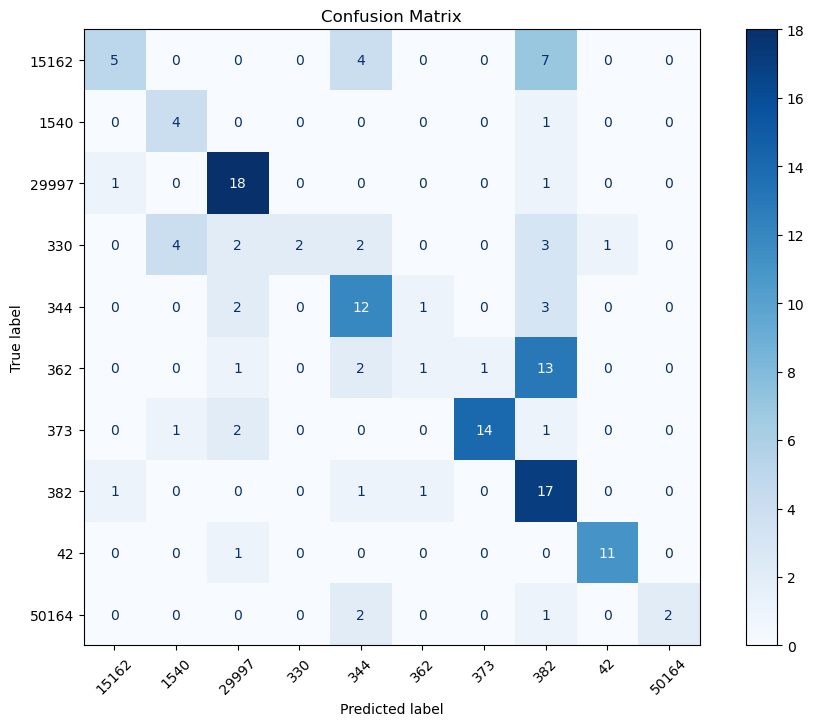

In [24]:
# Get non-empty classes in the validation folder
unique_labels = sorted([folder for folder in os.listdir(validation_folder) if len(os.listdir(os.path.join(validation_folder, folder))) > 0])
# Assuming 'true_labels' and 'predicted_labels' are already defined
# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=unique_labels)

plt.figure(figsize=(12, 8))
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation=45) 
plt.title("Confusion Matrix")
plt.show()
